#TRABAJO FINAL DIPLOMADO INTELIGENCIA DE NEGOCIOS
# Parte 1: Análisis Estadístico

## INTRODUCCIÓN

### Descripción General del Problema
En el presente trabajo, se desarrolla un proyecto de retención de clientes para una entidad financiera particular, mediante la utilización de métodos predictivos que orienten el despliegue de acciones comerciales puntuales, que permitan maximizar el beneficio económico a la organización, dentro de un universo dado de clientes, de los cuales se posee una serie de datos específicos.

### Contenido del Reporte
La estructura del reporte consta de los siguientes apartados:


*   **Introducción:** Corresponde a la presente sección, en la cual se describe brevemente el caso de negocio estudiado.

*   **Análisis Estadístico de los Datos:** Desarrollo del Preprocesamiento de los datos existentes, en el cual se identifica su naturaleza y comportamiento, la completitud de la base existente, la transformación y selección de los datos y atributos relevantes.

*   **Aplicación de Modelos de Minería de Datos:** Entrenamiento y testeo de diversos modelos predictivos de Clasificación, en los datos preprocesados, evaluando sus desempeños y configuraciones, particularmente, en lo que a sus respectivos hiperparámetros se refiere.

*   **Selección de Modelo Predictivo:** Una vez conocidas las métricas de desempeño de los diversos modelos, se pasa a seleccionar el que habilite maximizar el beneficio económico esperado para la organización, basándose en una comparación intramodelos, complementado con la visión de costos y beneficios que implican la retención o fuga de cada caso de cliente.

*   **Políticas y Acciones Comerciales:** Definición de intención general de cómo abordar la retención de clientes y propuesta de acciones puntuales para su logro (Campaña Focalizada de Retención de Clientes).

*   **Discusión y Conclusiones:** Racconto de los principales hallazgos encontrados, supuestos y propuestas relaizadas. Síntesis y elaboración de conclusiones.


### Objetivos del Estudio
En forma global, se tiene como objetivo general aplicar modelos predictivos de clasificación para aumentar la retención de clientes en una entidad financiera, orientando el despliegue de acciones comerciales concretas, focalizadas en los casos que puedan ser identificados tempranamente.

De forma más puntual, tenemos los siguientes objetivos específicos:

1.   Explorar estadísticamente los datos disponibles.
2.   Establecer la base de datos preprocesada a utilizar.
3.   Aplicar una batería de modelos predictivos para clasificación.
4.   Seleccionar el mejor modelo predictivo.
5.   Proponer acciones específicas para una campaña de retención de clientes.
6.   Realizar predicciones sobre un conjunto de datos de validación.





## IMPORTACIÓN DE LIBRERÍAS Y HERRAMIENTAS

A continuación se realiza la importación de las diversas librerías de Python a utilizar en el presente trabajo, con sus respectivos métodos, así como la definición de algunas funciones a aplicar.

En forma complementaria, se hace la importación inicial de los datos en su estado original, para ser utilizados.

In [ ]:
# @markdown Importación de Librerías y Herramientas

# manejo de datos
import numpy as np
import pandas as pd

# hay algunos warnings en la sección de "Desbalance de clases", con estas lineas los omitimos
import warnings
warnings.filterwarnings("ignore")

# imputación de datos
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# transformación
from sklearn.preprocessing import MinMaxScaler

# seleccion de modelos
from sklearn.model_selection import cross_val_score
from sklearn import model_selection 
# metricas
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# visualización
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='white', palette='inferno')

# desbalance de clases
# Undersampling
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
# Oversampling
from imblearn.over_sampling import RandomOverSampler
# SMOTE
from imblearn.over_sampling import SMOTE

# indicadores de desempeño
# accuracy
from sklearn.metrics import accuracy_score
# ROC
from sklearn.metrics import roc_curve
# probabilidades de predicción
from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, accuracy_score

# seleccion de modelos
from sklearn.model_selection import cross_val_score
from sklearn import model_selection

# matriz de confusión
from sklearn.metrics import classification_report, confusion_matrix

# algoritmos
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Logit
from sklearn.linear_model import LogisticRegression
# árbol de decisión
from sklearn.tree import DecisionTreeClassifier
# tree (árbol de decisión gráfico)
from sklearn import tree
# SVM
from sklearn.svm import SVC
# random forest
from sklearn.ensemble import RandomForestClassifier




In [ ]:
# @markdown Matriz de confusion

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    fig = plt.figure(figsize=(6,6))
    plt.title(title, figure=fig)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, figure=fig)
    plt.yticks(tick_marks, classes, figure=fig)

    # normalized confusion matrix
    ncm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = 0.5
    for i, j in itertools.product(range(ncm.shape[0]), range(ncm.shape[1])):
        plt.text(j, i, str(round(100*ncm[i, j],2))+"%",
                 horizontalalignment="center",
                 color="white" if ncm[i, j] > thresh else "black",
                 fontsize=12, figure=fig)
        plt.text(j, i+0.1, str(cm[i, j]),
                 horizontalalignment="center",
                 color="black",
                 fontsize=10, figure=fig)

    plt.imshow(ncm, interpolation='nearest', cmap=cmap, vmin=0, vmax=1, figure=fig)

    plt.colorbar()

    plt.tight_layout()
    plt.ylabel('True label',figure=fig)
    plt.xlabel('Predicted label',figure=fig)
    plt.close(fig)
    return fig


def get_cm(true_labels, predicted_labels):
    #get confusion matrix
    labels = np.unique(predicted_labels)
    cm = confusion_matrix(true_labels, predicted_labels, labels=labels)
    #get plot of confusion matrix
    plot = plot_confusion_matrix(cm, labels)
    return plot

## ANÁLISIS ESTADÍSTICO DE LOS DATOS

### Importación de datos

In [ ]:
# @markdown **Carga de datos y conteo de valores Nan** \\
# @markdown Podemos observar que las variables con mayor número de missing son las variables del tipo categoricas, tales como GENERO, NIV_EDUC, E_CIVIL, seguidas de COD_COM, CIUDAD y EDAD. \\
# read data (esta base ya ha sido procesada)
data = pd.read_csv("https://raw.githubusercontent.com/ssantanar/datasets/master/fuga/BASEFUGA_GENERAL.csv", sep=",")

# contar missing values
data.isna().sum()

ID               0
GENERO          11
RENTA            0
EDAD             2
NIV_EDUC        11
E_CIVIL         11
COD_OFI          0
COD_COM          3
CIUDAD           3
D_Marzo          0
D_Abril          0
D_Mayo           0
D_Junio          0
D_Julio          0
D_Agosto         0
D_Septiembre     0
M_MOROSO         0
MONTO            0
SEGURO           0
FUGA             0
dtype: int64

In [ ]:
# @markdown **Información de la data** \\
# @markdown Notar que las varibles categorias son de tipo 'Object'.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2294 non-null   int64  
 1   GENERO        2283 non-null   object 
 2   RENTA         2294 non-null   int64  
 3   EDAD          2292 non-null   float64
 4   NIV_EDUC      2283 non-null   object 
 5   E_CIVIL       2283 non-null   object 
 6   COD_OFI       2294 non-null   int64  
 7   COD_COM       2291 non-null   float64
 8   CIUDAD        2291 non-null   object 
 9   D_Marzo       2294 non-null   int64  
 10  D_Abril       2294 non-null   int64  
 11  D_Mayo        2294 non-null   int64  
 12  D_Junio       2294 non-null   int64  
 13  D_Julio       2294 non-null   int64  
 14  D_Agosto      2294 non-null   int64  
 15  D_Septiembre  2294 non-null   int64  
 16  M_MOROSO      2294 non-null   int64  
 17  MONTO         2294 non-null   int64  
 18  SEGURO        2294 non-null 

In [ ]:
data.head(5)

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA
0,1,M,746476,39.0,MED,CAS,68,213.0,LOS ANGELES,0,38292,0,434357,1766,9110,340,2,2000000,NO,NO FUGA
1,2,F,11901,49.0,MED,VIU,16,89.0,SANTIAGO,0,0,0,0,48,0,0,1,7500000,SI,NO FUGA
2,3,M,1651421,39.0,TEC,CAS,90,16.0,ANTOFAGASTA,0,604169,0,0,323,26489,2925,1,8000000,NO,NO FUGA
3,4,F,638969,36.0,UNV,CAS,85,115.0,SANTIAGO,0,5125,0,198998,94,0,105,1,2600000,NO,NO FUGA
4,5,M,860113,44.0,TEC,CAS,45,80.0,SANTIAGO,0,11946,0,73959,149,0,272,1,6400000,NO,NO FUGA


**Comentario:** \\
De aquí podemos apreciar que el set de datos disponible consta de 20 atributos (incluyendo el ID de cada registro), de los cuales 6 poseen datos faltantes.

A continuación se presenta un análisis exploratorio inicial del conjunto de datos.

### Análisis exploratorio inicial

In [ ]:
# Copiar Datos Originales para Trabajar
Datos = data.copy()
print("Cantidad de Registros: ", len(Datos))
Datos.describe().round(2)

Cantidad de Registros:  2294


,ID,RENTA,EDAD,COD_OFI,COD_COM,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO
count,2294.00,2294.00,2292.00,2294.00,2291.00,2294.00,2294.00,2294.00,2294.00,2294.00,2294.00,2294.00,2294.00,2294.00
mean,1147.50,852756.27,43.55,68.54,107.95,153020.64,272681.03,103231.53,189976.06,566.85,3578.76,1940.64,1.25,3477092.41
std,662.37,1379715.21,8.88,40.16,84.77,498187.54,402325.69,870698.44,670504.23,1075.33,8942.38,9868.82,0.75,2292933.05
min,1.00,176.00,-50.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,500000.00
25%,574.25,100381.50,39.00,31.00,80.00,0.00,17674.25,0.00,0.00,7.00,0.00,0.00,1.00,1700000.00
50%,1147.50,369934.50,44.00,56.00,90.00,0.00,134474.50,0.00,5502.00,146.00,0.00,56.00,1.00,2600000.00
75%,1720.75,826758.25,50.00,92.00,118.00,0.00,374425.00,0.00,174906.00,629.75,1486.25,497.25,2.00,4800000.00
max,2294.00,8454317.00,130.00,155.00,516.00,9458161.00,5495534.00,18396961.00,20634612.00,11187.00,88837.00,249652.00,3.00,8000000.00


**Comentarios:** \\
1. De acuerdo a la tabla descriptiva, contamos con 2294, donde la variable atributo Código Comuna "COD_COM" posee 3 registros perdidos, tal como se pudo apreciar en la importación inicial de datos.

2. Podemos identificar que para la variable "EDAD" existe un valor mínimo fuera de rango, correspondiente a edades negativas. Por su parte, el registro máximo de edad se eleva a los 130 años, lo que representa un registro, posiblemente fuera de rango (o al menos outlier), teniendo en cuenta que la persona más longeva de la cual se tiene registro histórico en el mundo es menor a 123 años y la actualmente viva es menor a 119 años. Es importante además la diferencia entre el tercer cuartil y el valor máximo, siendo de 80 años.

3. En forma adicional, para los demás atributos, si bien no hay razones para pensar en valores fuera de rango, puesto que son aparentemente posibles, es llamativa a distribución mostrada por las variables correspondientes a las deudas de Marzo, Mayo y en menor medida Agosto. Lo anterior debido a que a nivel de cuartiles, los datos no nulos solo existen, concentrados, en el cuarto segmento (y también en el tercero para el mes de Agosto). Bajo esta perspectiva, resulta interesante considerar eventos estacionales asociado a mayores niveles de gasto que puedan desencadenar aumento de la deuda.


### Atributos categóricos 

Puesto que las variables categóricas no son incluidas en la tabla de estadísticos mostrada anteriormente, es que a continuación se presentan los valores posibles para dichos atributos.

#### Género

Cantidad de Registros de Género:  2294
La Moda para la variable 'GENERO' es:  M
M    1385
F     898
Name: GENERO, dtype: int64


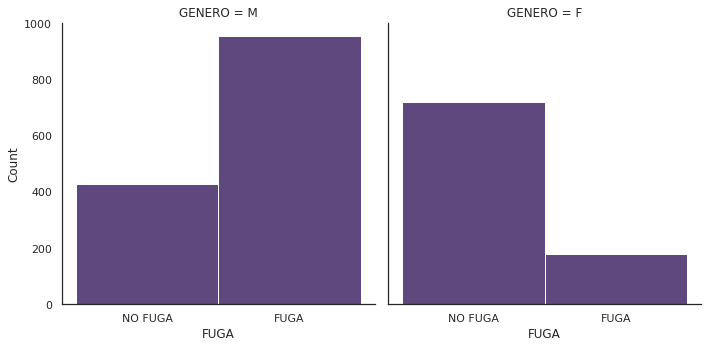

In [ ]:
print("Cantidad de Registros de Género: ", len(Datos['GENERO']))
print("La Moda para la variable 'GENERO' es: ", Datos['GENERO'].mode()[0])
print(Datos['GENERO'].value_counts())
sns.displot(data=Datos, x='FUGA', col='GENERO')

Para el atributo "GENERO", tenemos un total de 2294 registros, distribuidos en dos clases, con mayoría de observaciones en la categoría M (Masculino). Al sumar los datos de M con F, se obtienen 2283 datos, lo que al hacer la diferencia con el total, permite recuperar la referencia inicial de 11 valores perdidos.

En forma complementaria, se puede reconocer que para el caso de los clientes masculinos, existe una mayoría importante de casos de fuga. Por el contrario, para el caso de clientes femeninos, la gran mayoría de casos se mantiene fiel a la organización.

#### Nivel Educacional

Cantidad de registros de Nivel Educacional:  2294
La Moda para la variable 'NIV_EDUC' es:  UNV
UNV    947
TEC    698
MED    615
EUN     12
BAS     11
Name: NIV_EDUC, dtype: int64


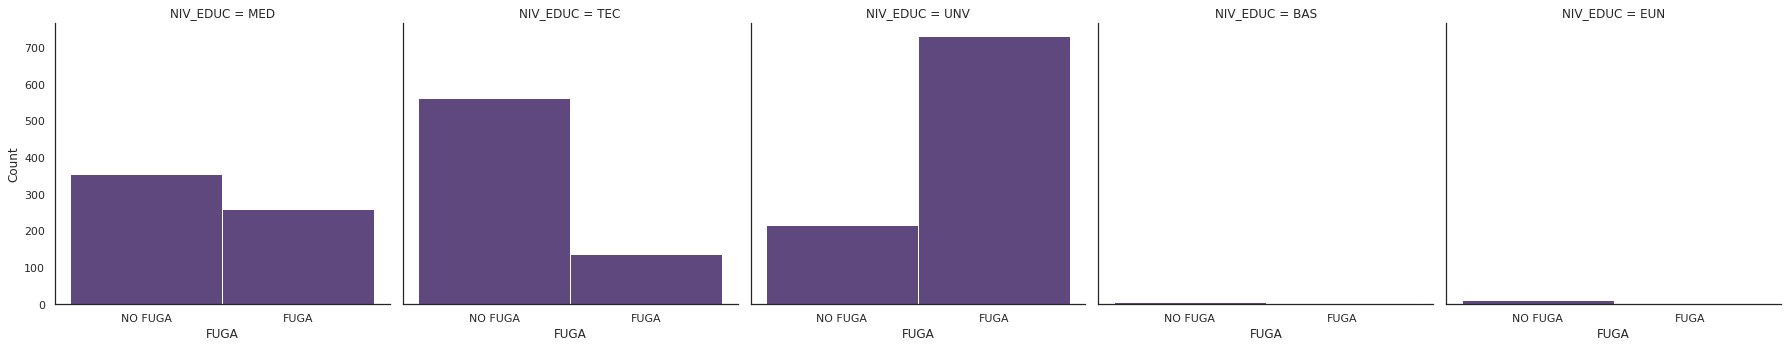

In [ ]:
print("Cantidad de registros de Nivel Educacional: ", len(Datos['NIV_EDUC']))
print("La Moda para la variable 'NIV_EDUC' es: ", Datos['NIV_EDUC'].mode()[0])
print(Datos['NIV_EDUC'].value_counts())
sns.displot(data=Datos, x='FUGA', col='NIV_EDUC')

Para la variable "NIV_EDUC", se tienen 5 clases distintas, donde las que agrupan más registros son las clases "universitaria", "técnica" y "media". De forma análoga a género, al sumar todos los registros de las distintas clases, se recupera la cantidad de 11 valores faltantes para esta variable.

De los gráficos de barra, se observa una clara mayoría de fuga en los clientes con educación universitaria. Por el contrario, en todas las otras categorías, es mayor la cantidad de clientes que no fugan, siendo especialmente marcado en los casos con educación de nivel técnico. 

#### Estado Civil

Cantidad de Registros de Estado Civil:  2294
La Moda para la variable 'E_CIVIL' es:  CAS
CAS    1429
SOL     642
SEP     114
VIU      98
Name: E_CIVIL, dtype: int64


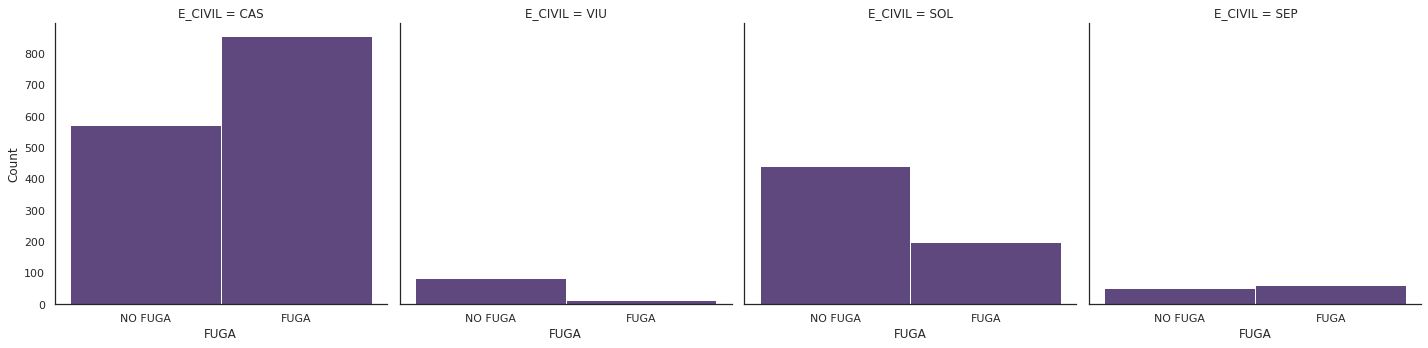

In [ ]:
print("Cantidad de Registros de Estado Civil: ", len(Datos['E_CIVIL']))
print("La Moda para la variable 'E_CIVIL' es: ", Datos['E_CIVIL'].mode()[0])
print(Datos['E_CIVIL'].value_counts())
sns.displot(data=Datos, x='FUGA', col='E_CIVIL')

Para el atributo "E_CIVIL", se tienen 4 clases distintas, donde las que agrupan más registros son las clases "casado" y "soltero". Igual que en los casos anteriores, al sumar todos los registros de las distintas clases, se recupera la cantidad de 11 valores faltantes para esta variable.

En relación con la distribución de los datos respecto a la condición de fuga, el comportamiento es disímil en los diversos estados, existiendo una mayoría de casos fugados para los clientes "casados" y "separados", sin ser diferencias tan marcadas como se mostraba para las variables anteriores en algunas de sus categorías. Por su parte, en clientes viudos y solteros predomina claramente la condición de no fuga.



#### Meses en mora

Cantidad de Registros de Meses Morosos:  2294
La Moda para la variable 'M_MOROSO' es:  1
1    1430
2     431
0     241
3     192
Name: M_MOROSO, dtype: int64


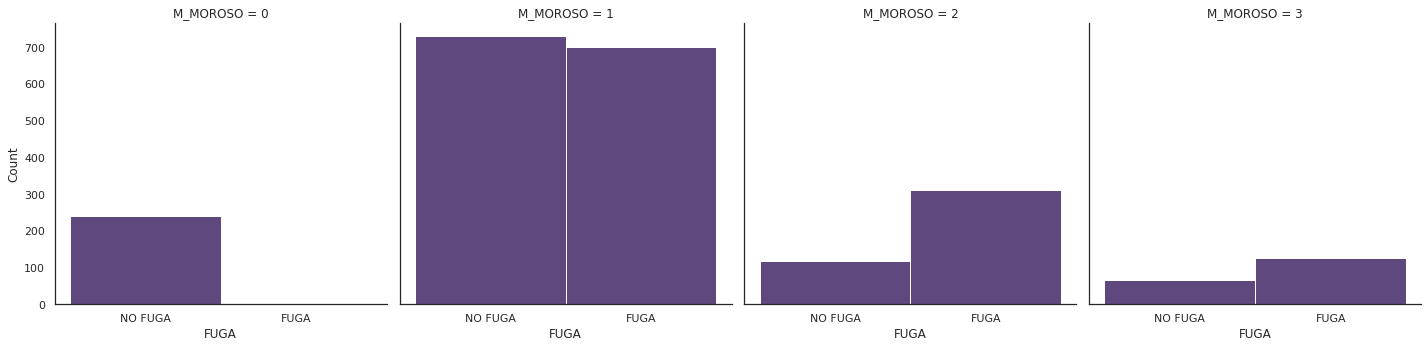

In [ ]:
print("Cantidad de Registros de Meses Morosos: ", len(Datos['M_MOROSO']))
print("La Moda para la variable 'M_MOROSO' es: ", Datos['M_MOROSO'].mode()[0])
print(Datos['M_MOROSO'].value_counts())
sns.displot(data=Datos, x='FUGA', col='M_MOROSO')

Para la variable "M_MOROSO", correspondiente a la cantidad de meses en que el cliente ha caído en condición de mora, tenemos que el set de datos presenta 4 valores posibles, desde 0 a 3. Cabe destacar que el 62% de los clientes han caído en mora 1 mes y solo un 10% se ha mantenido siempre al día con el pago de sus cuentas.

De forma complementaria, se observa que los clientes que se han mantenido al día con el pago, es decir, no poseen meses en mora registrados, predomina la condición de no fuga. Por otro lado, los clientes con 1 mes de mora poseen una distribución más pareja, predominando levemente la condición de fuga. Finalmente, para los clientes con 2 o 3 meses de mora es mayor el resultado final de abandono de la relación comercial con la organización.



#### Seguro de gravamen

Cantidad de Registros de Seguro:  2294
La Moda para la variable 'SEGURO' es:  NO
NO    1816
SI     478
Name: SEGURO, dtype: int64


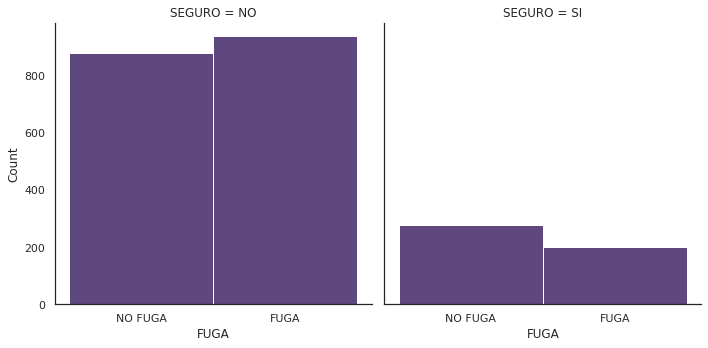

In [ ]:
print("Cantidad de Registros de Seguro: ", len(Datos['SEGURO']))
print("La Moda para la variable 'SEGURO' es: ", Datos['SEGURO'].mode()[0])
print(Datos['SEGURO'].value_counts())
sns.displot(data=Datos, x='FUGA', col='SEGURO')

En la variable "SEGURO" podemos observar que la mayoría de los clientes no poseen uno contratado. Fuera de lo anterior, la variable no muestra un comportamiento marcado respecto a la fidelidad de los clientes, siendo levemente mayor la fuga en los casos de clientes sin seguro, condición que se muestra inversa en los casos con seguro.

Intuitivamente, se puede especular que, poseer un seguro de gravamenes puede sugerir perfiles de clientes más adversos al riesgo. No obstante, al igual que las demás variables, esta  debe ser analizada en un proceso de pre selección de atributos y se debe fundamentar dicha hipotesis. 



### Variables discretas y continuas

#### Códigos referenciales (oficina, comuna, ciudad) 

A continuación se exploran las variables categóricas que dicen relación con la ubicación espacial o geofráfica de los diversos clientes de la entidad financiera.

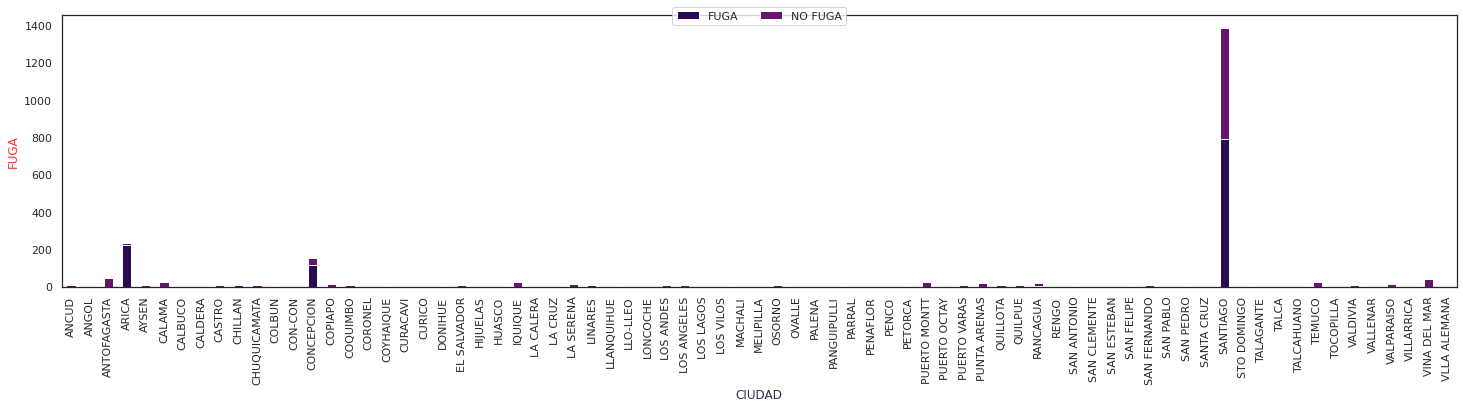

In [ ]:
group = Datos.copy()
plt.rcParams["figure.figsize"] = (25, 5)
group.groupby(['CIUDAD','FUGA']).size().unstack(fill_value=0).plot(kind='bar',stacked=True)
plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.05))
plt.xlabel('CIUDAD', color='#2D3249')
plt.ylabel('N° clientes', color='#FF3333')
plt.xticks(rotation=90)
plt.show()

Del gráfico anterior es directo observar que existen un par de cuidades que concentran no solo mayor cantidad de clientes, sino que también destacan en la concentración de clientes fugados.

A continuación, se presentan las ciudades con más de 10 clientes.

In [ ]:
A1 = Datos.groupby('CIUDAD')['FUGA'].agg(['count']).sort_values(['count'], ascending=False)
A1[A1['count']>10]

,count
CIUDAD,
SANTIAGO,1389
ARICA,234
CONCEPCION,152
ANTOFAGASTA,47
VINA DEL MAR,42
CALAMA,23
TEMUCO,23
PUERTO MONTT,22
IQUIQUE,22


De listado anterior, se observa que las ciudades de Santiago, Arica, Concepción, Antofagasta y Viña del Mar, son las que concetran mayor cantidad de clientes, y por ende pueden resultar objeto de futuros análisis adicionales, así como posibles políticas comerciales específicas, en caso de que se estime pertinente.

In [ ]:
Datos[(Datos['CIUDAD']=='SANTIAGO') | (Datos['CIUDAD']=='ARICA') | (Datos['CIUDAD']=='CONCEPCION') | (Datos['CIUDAD']=='ANTOFAGASTA') | (Datos['CIUDAD']=='VINA DEL MAR')].groupby(['CIUDAD', 'FUGA'])['CIUDAD'].agg(['count']).sort_values(by=['CIUDAD', 'FUGA'], ascending = [True, False])

count
CIUDAD       FUGA          
ANTOFAGASTA  NO FUGA     47
ARICA        NO FUGA      9
             FUGA       225
CONCEPCION   NO FUGA     37
             FUGA       115
SANTIAGO     NO FUGA    595
             FUGA       794
VINA DEL MAR NO FUGA     42

En la tabla anterior, se tiene el desglose según condición de fuga para las ciudades antes mencionadas, donde Antofagasta y Viña del Mar, no presentan clientes fugados. De este modo, la gestión posterior, se puede focalizar en Santiago, Arica y Concepción, que son las ciudades con mayor cantidad de clientes fugados.

Por otro lado, del recuento inicial de datos faltantes, sabemos que existen un par de registros con valores perdidos para el atributo de "CIUDAD". De este modo, a continuación se identificarán dichos clientes.

In [ ]:
ciudadfaltante = pd.isnull(group['CIUDAD'])
group[ciudadfaltante]

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA
263,264,F,91397,49.0,MED,CAS,45,NaN,NaN,0,58355,0,0,33,19746,0,1,6500000,NO,NO FUGA
279,280,M,187937,35.0,UNV,CAS,90,NaN,NaN,0,0,0,0,1025,6588,0,1,1200000,NO,NO FUGA
1014,1015,M,564286,49.0,UNV,VIU,45,NaN,NaN,0,344228,0,0,0,23101,0,1,6500000,NO,NO FUGA


En la tabla anterior, podemos observar que al explorar los datos faltantes para el atributo "CIUDAD", los mismos registros también presentan datos faltantes en la variable "COD_COM". Como se observó tras importar la base de datos, los atributos ya mencionados presentaban ambos 3 datos faltantes, por lo que mediante el extracto anterior del set de datos, se puede concluir, que son exactamente los mismos. Luego, dado que el código de la comuna y la ciudad están inherentemente vinculados, el tratamiento que se realice de ellos deben también ser de forma conjunta.

In [ ]:
codcomfaltante = pd.isnull(group['COD_COM'])
group[codcomfaltante]

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA
263,264,F,91397,49.0,MED,CAS,45,NaN,NaN,0,58355,0,0,33,19746,0,1,6500000,NO,NO FUGA
279,280,M,187937,35.0,UNV,CAS,90,NaN,NaN,0,0,0,0,1025,6588,0,1,1200000,NO,NO FUGA
1014,1015,M,564286,49.0,UNV,VIU,45,NaN,NaN,0,344228,0,0,0,23101,0,1,6500000,NO,NO FUGA


La tabla anterior se muestra solo para validar que al realizar el filtro de búsqueda mediante el atributo "COD_COM", se obtienen los mismos resultados que mediante el filtro de valores nulos aplicado a la variable "CIUDAD".

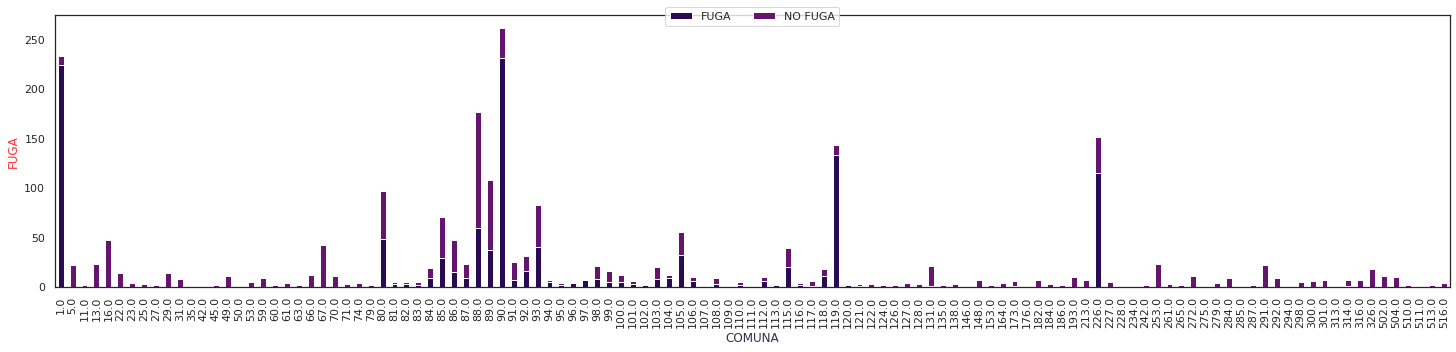

In [ ]:
group2 = Datos.copy()
plt.rcParams["figure.figsize"] = (25, 5)
group2.groupby(['COD_COM','FUGA']).size().unstack(fill_value=0).plot(kind='bar',stacked=True)
plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.05))
plt.xlabel('COMUNA', color='#2D3249')
plt.ylabel('FUGA', color='#FF3333')
plt.xticks(rotation=90)
plt.show()

Del gráfico de barras apiladas anterior, se puede apreciar que hay algunos códigos de comunas que concentran mayor número de clientes, particularmente, se pueden observar 4 comunas que tienen una gran cantidad de fugados.

A continuación, se presentan los códigos de comunas con más clientes asociados, con un piso de 10 clientes, identificando su condición de fuga o no fuga.

In [ ]:
group2C1 = group2.groupby(['COD_COM', 'FUGA'])['FUGA'].agg(['count']).sort_values(['count'], ascending=False)
group2C1[group2C1['count']>10]

count
COD_COM FUGA          
90.0    FUGA       232
1.0     FUGA       225
119.0   FUGA       134
88.0    NO FUGA    117
226.0   FUGA       115
89.0    NO FUGA     71
88.0    FUGA        60
80.0    FUGA        49
        NO FUGA     48
16.0    NO FUGA     47
93.0    NO FUGA     43
67.0    NO FUGA     42
85.0    NO FUGA     42
93.0    FUGA        40
226.0   NO FUGA     37
89.0    FUGA        37
86.0    NO FUGA     33
105.0   FUGA        32
90.0    NO FUGA     30
85.0    FUGA        29
105.0   NO FUGA     24
253.0   NO FUGA     23
13.0    NO FUGA     23
5.0     NO FUGA     22
291.0   NO FUGA     22
131.0   NO FUGA     20
115.0   FUGA        20
        NO FUGA     19
326.0   NO FUGA     18
91.0    NO FUGA     18
92.0    FUGA        16
86.0    FUGA        15
92.0    NO FUGA     15
22.0    NO FUGA     14
87.0    NO FUGA     14
29.0    NO FUGA     14
98.0    NO FUGA     13
103.0   NO FUGA     12
66.0    NO FUGA     12
99.0    NO FUGA     11
502.0   NO FUGA     11
70.0    NO FUGA     11
272.0   NO FUGA     11
118.0   FUGA        11
49.0    NO FUGA     11

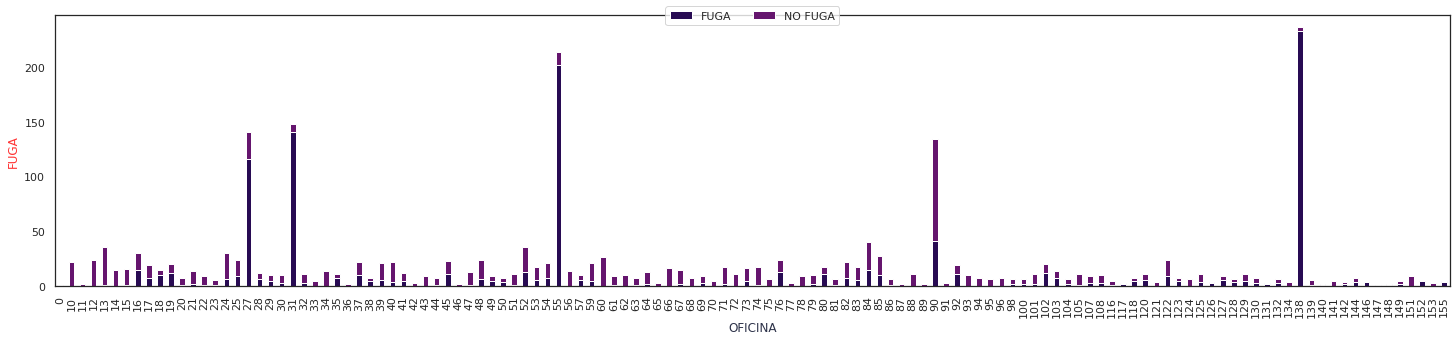

In [ ]:
group1 = Datos.copy()
plt.rcParams["figure.figsize"] = (25, 5)
group1.groupby(['COD_OFI','FUGA']).size().unstack(fill_value=0).plot(kind='bar',stacked=True)
plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.05))
plt.xlabel('OFICINA', color='#2D3249')
plt.ylabel('FUGA', color='#FF3333')
plt.xticks(rotation=90)
plt.show()

En el gráfico anterior, se observan 5 oficinas que destacan en cuanto al total de clientes asociados, predomienando en 4 de ellas, la condición de clientes fugados.

Se presenta a continuación un listado con los códigos de oficinas que poseen mayor cantidad de clientes, con un piso de 10 clientes, identificando si pertenecen a la clase de fugados o no.

In [ ]:
group1C1 =group1.groupby(['COD_OFI', 'FUGA'])['COD_OFI'].agg(['count']).sort_values(by='count', ascending = False)
group1C1[group1C1['count']>10]

count
COD_OFI FUGA          
138     FUGA       233
55      FUGA       202
31      FUGA       141
27      FUGA       116
90      NO FUGA     93
        FUGA        41
13      NO FUGA     35
60      NO FUGA     27
27      NO FUGA     25
84      NO FUGA     25
12      NO FUGA     24
52      NO FUGA     23
24      NO FUGA     23
10      NO FUGA     22
85      NO FUGA     18
40      NO FUGA     18
66      NO FUGA     17
48      NO FUGA     17
74      NO FUGA     17
59      NO FUGA     16
71      NO FUGA     16
122     NO FUGA     15
84      FUGA        15
16      NO FUGA     15
        FUGA        15
15      NO FUGA     15
14      NO FUGA     15
39      NO FUGA     15
25      NO FUGA     15
34      NO FUGA     14
56      NO FUGA     14
82      NO FUGA     14
67      NO FUGA     13
52      FUGA        13
76      FUGA        13
54      NO FUGA     13
55      NO FUGA     12
53      NO FUGA     12
37      NO FUGA     12
47      NO FUGA     12
45      NO FUGA     12
83      NO FUGA     12
102     FUGA        12
73      NO FUGA     12
19      FUGA        12
21      NO FUGA     12
17      NO FUGA     11
45      FUGA        11
72      NO FUGA     11
76      NO FUGA     11
64      NO FUGA     11
80      FUGA        11
88      NO FUGA     11
92      FUGA        11

Del listado anterior, se puede identificar que las oficinas con más clientes fugados son las de códigos 138, 55, 31, 27 y 90.

In [ ]:
from scipy import stats
aux1 = group.groupby(['COD_COM'])['CIUDAD'].agg([stats.mode])
aux2 = aux1.sort_values(by=['mode'], ascending= False)
aux2

,mode
COD_COM,
71.0,"([VLLA ALEMANA], [3])"
67.0,"([VINA DEL MAR], [42])"
261.0,"([VILLARRICA], [3])"
66.0,"([VALPARAISO], [12])"
25.0,"([VALLENAR], [3])"
...,...
316.0,"([AYSEN], [7])"
1.0,"([ARICA], [234])"
16.0,"([ANTOFAGASTA], [47])"


Del listado anterior, se observa que para cada código específico de las comunas, se tienen ciudades puntuales, que representan la moda asociada, con su respectiva frecuencia. A pesar de que el sentido común sugiere que cada comuna está asociada a una única ciudad, no se puede descartar a priori que así sea en todos los casos.

Se muestran a continuación los posibles valores que toma la variable "COD_COM", así como la moda de la misma, dado que es una variable categórica.

In [ ]:
print("Posibles Valores para Atributo 'COD_COM'")
group['COD_COM'].unique()

Posibles Valores para Atributo 'COD_COM'


array([213.,  89.,  16., 115.,  80.,  92.,  90., 112.,   1., 103.,  93.,
       105., 110.,  88., 119.,  85., 226., 227., 108., 253.,  86., 131.,
        87.,  98., 502., 104., 287.,  13., 100., 326.,  83., 513.,  71.,
        96., 113., 284.,  91.,   5., 118.,  67.,  84., 127.,  95.,  29.,
        53., 138., 300., 193., 106., 184., 128., 272.,  97., 504., 314.,
        81., 111., 301.,  31., 265., 164.,  49., 176.,  nan,  82., 117.,
       313., 298., 516., 285.,  70.,  23., 122., 173., 148., 291.,  59.,
        66., 101.,  94.,  61.,  79., 511., 124., 316.,  99.,  42., 279.,
       102., 120., 234.,  22., 292., 182., 126.,  11., 116., 242., 186.,
        50., 107.,  63.,  74., 121., 135.,  25., 294., 153.,  27., 275.,
       261.,  60.,  45., 109., 510.,  35., 146., 228.])

In [ ]:
print("Moda para atributo COD_COM")
group['COD_COM'].mode()[0]

Moda para atributo COD_COM


90.0

In [ ]:
acc = group[group['COD_COM']==90]
acc

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA
6,7,M,28732,45.0,UNV,CAS,55,90.0,SANTIAGO,559984,532706,0,0,1464,15600,1523,1,2900000,NO,FUGA
11,12,F,81895,37.0,TEC,CAS,139,90.0,SANTIAGO,0,71058,0,0,40,0,0,1,1900000,NO,NO FUGA
16,17,M,28267,45.0,UNV,CAS,55,90.0,SANTIAGO,0,197999,0,503706,326,0,5994,3,4000000,SI,FUGA
33,34,M,2508956,44.0,MED,CAS,55,90.0,SANTIAGO,623615,1681538,0,0,3201,0,57256,3,4600000,SI,FUGA
37,38,M,1233336,44.0,UNV,CAS,55,90.0,SANTIAGO,193646,15527,0,0,836,0,0,2,3000000,NO,FUGA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,2216,M,4638,41.0,NaN,CAS,55,90.0,SANTIAGO,0,17570,0,96204,599,11950,31,1,3400000,NO,FUGA
2220,2221,M,49729,49.0,UNV,SEP,102,90.0,SANTIAGO,0,9263,0,189524,797,0,14640,3,3100000,NO,FUGA
2270,2271,M,6367994,40.0,UNV,CAS,55,90.0,SANTIAGO,0,0,0,22514,7,6271,2,1,2200000,NO,FUGA
2292,2293,M,4034859,42.0,UNV,CAS,55,90.0,SANTIAGO,0,406679,0,257251,37,1606,173,2,4600000,NO,FUGA


De la tabla anterior, tal como se podría esperar, es posible observar que existe una relación únivoca entre el código de la comuna y la ciudad. Particularmente, para el código de comuna 90, corresponde a una ubicada en la ciudad de Santiago, lo que se valida a continuación, mostrando los posibles valores que toma el atributo "COD_COM", cuando el código es 90.

In [ ]:
print("Valores posibles para COD_COM cuando el código es 90: " , acc['CIUDAD'].unique()[0])

Valores posibles para COD_COM cuando el código es 90:  SANTIAGO


In [ ]:
accCiudad = acc.groupby('CIUDAD')['COD_COM'].agg([stats.mode])
accCiudad

,mode
CIUDAD,
SANTIAGO,"([90.0], [262])"


#### Renta

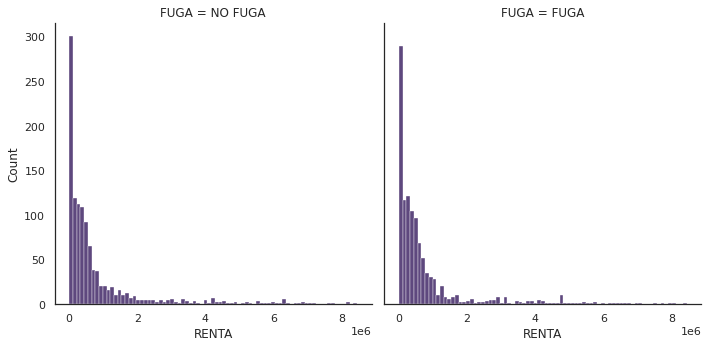

In [ ]:
sns.displot(data=Datos, x='RENTA', col='FUGA')

En los gráficos anteriores, podemos observar la distribución de la renta para los distintos clientes, donde es clara la concentración de observaciones para valores entre 0 y 2 millones de pesos, con el resto de los datos poco concentrados entre los 2 y más de 8 millones de pesos. De este modo, con tal de comprender mejor la naturaleza de la variable "RENTA", es una posibilidad útil realizar más adelante una transformación de tipo logarítmica.

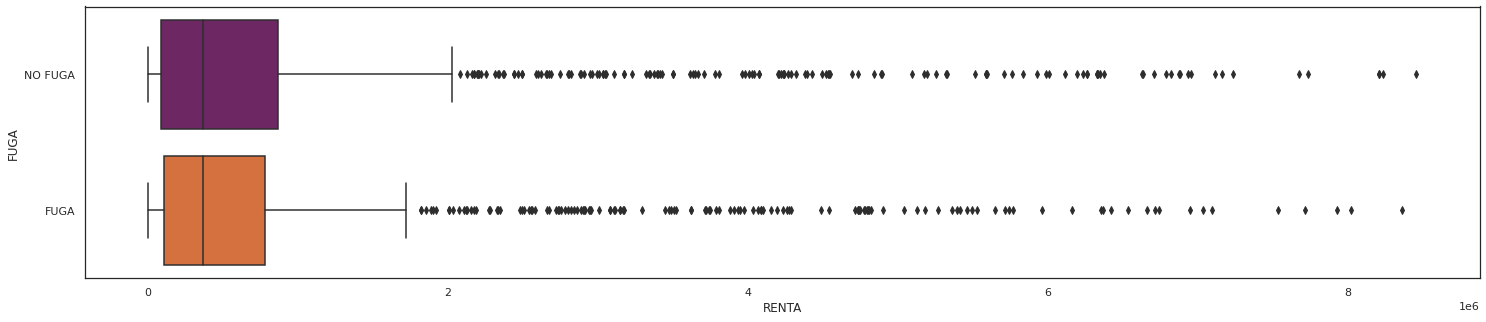

In [ ]:
sns.boxplot(x='RENTA', y='FUGA', data=Datos, palette='inferno', orient='h')

Reforzando lo mostrado en el gráfico de barras, el gráfico de cajas nos muestra una concentración de los 3 primeros cuartiles, entre 0 y 1 millón de pesos, independiente de si el cliente se fuga o no, con medianas menores a $500.000 y muchos registros mayores al cuarto cuartil. Cabe señalar que a priori, desde la realidad del negocio, no existe ningún problema o restricción con rentas de gran magnitud, especificamente entre 2 y más de 8 millones, razón por la cual dichos valores, si bien se alejan de los tres primeros cuartiles, son completamente factibles y aceptables.

#### Monto crédito preaprobado

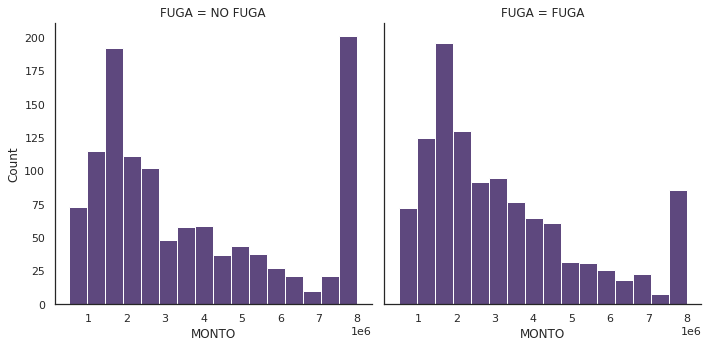

In [ ]:
sns.displot(data=Datos, x='MONTO', col='FUGA')

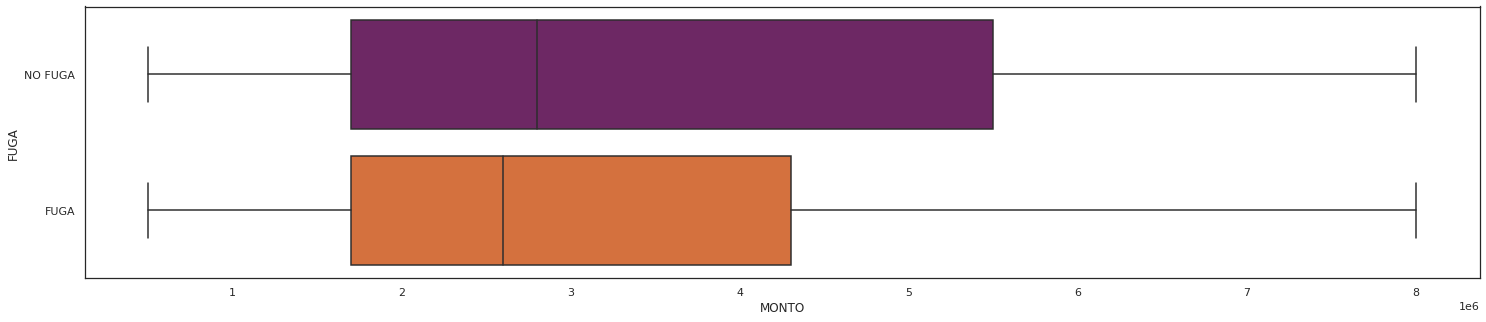

In [ ]:
sns.boxplot(x='MONTO', y='FUGA', data=Datos, palette='inferno', orient='h')

De los gráficos anteriores podemos observar que para la variable "MONTO" hay una concentración en los valores menores a 3 millones de pesos, así como una acumulación importante en el valor máximo, correspondiente a 8 millones, para los casos de fuga y no fuga, no obstante, predominante para el caso de clientes con fuga. 

El Boxplot, evidencia una dispersión mayor para los clientes de no fuga. 

En este caso, a diferencia de variable "RENTA", no es tan claro a priori la utilidad de una posible transformación logarítmica para entender más el comportamiento del atributo en cuestión.

Podemos interpretar el atributo "MONTO" de crédito preaprobado,  como un indicador de la valoración del cliente por parte de la entidad bancaria. No obstante, la distribución antes presentada no muestra un patrón claro que destacar en cuanto al monto de crédito preaprobado para los clientes y su comportamiento de fuga, puesto que en ambas situaciones se aprecia, a grandes rasgos, distribuciones muy similares.

#### Edad

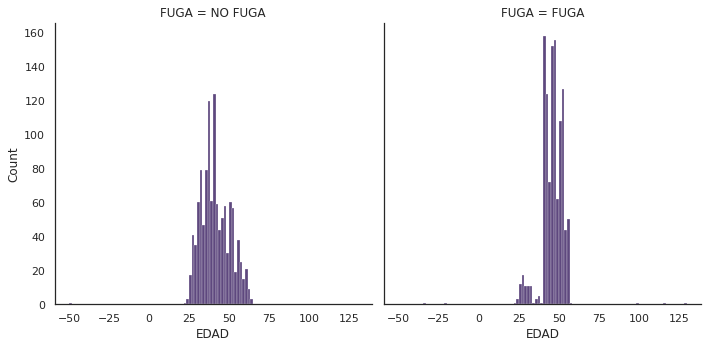

In [ ]:
sns.displot(data=Datos, x='EDAD', col='FUGA')

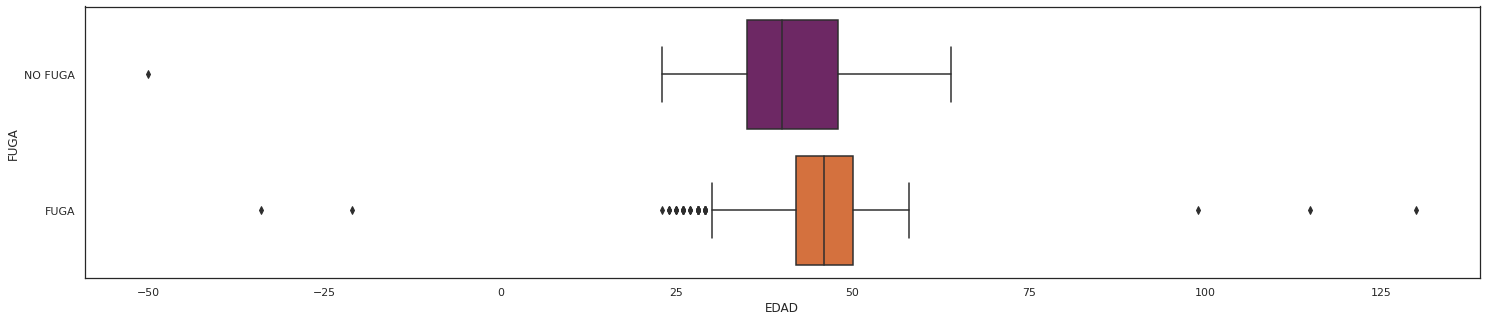

In [ ]:
sns.boxplot(x='EDAD', y='FUGA', data=Datos, palette='inferno', orient='h')

Para la variable "EDAD" se pueden observar un par de aspectos destacables. Lo primero es la existencia de datos fuera de rango, por tratarse de edades negativas. A su vez, en el caso de cliente que sí se fugan, se pueden observar algunos registros extremos. Tal como fue mencionado anteriormente, las edades elevadas, en este caso, mayores a 100 años, son posibles pero menos frecuentes, por lo que idealmente, se debe analizar su naturaleza.

Por otro lado, podemos observar que los clientes que efectivamente se fugaron, presentan una variación menor en su edad, en comparación con los que no lo hicieron, con una concentración de registros en una edad levemente mayor para el caso de los clientes fugados.

A continuación se presentan los registros con edades fuera de rango o extremas, según sea el caso.

In [ ]:
Datos[(Datos['EDAD']>90) | (Datos['EDAD']<0)]

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA
583,584,M,3976014,115.0,UNV,CAS,55,90.0,SANTIAGO,0,0,0,0,148,0,0,1,1800000,NO,FUGA
1283,1284,M,482564,-21.0,UNV,SEP,122,89.0,SANTIAGO,0,24497,0,11561,20,0,0,1,3400000,NO,FUGA
1338,1339,M,15086,-34.0,BAS,CAS,55,90.0,SANTIAGO,392608,1673,0,268995,592,0,10445,1,900000,NO,FUGA
1480,1481,M,130582,130.0,UNV,CAS,31,119.0,SANTIAGO,0,1239039,0,952369,140,0,1075,2,1100000,NO,FUGA
1710,1711,M,633982,-50.0,TEC,SOL,15,513.0,CON-CON,0,210886,0,0,9,8921,61,1,1900000,NO,NO FUGA
1797,1798,M,647536,99.0,MED,CAS,122,97.0,SANTIAGO,0,169828,0,274195,450,4286,206,2,1800000,NO,FUGA


De la tabla anterior podemos mencionar que la mayoría de los registros corresponden a clientes de la ciudad de Santiago y que se fugaron, salvo el cliente de Con-Cón que no se fugó. Además, son todos de género masculino y ninguno contaba con seguro.

Se puede señalar que las edades cercanas y superiores a 100 años, son valores outliers, puesto que además de la ya mencionada baja probabilidad de ocurrencia que presentan, existen también en algunas entidades bancarias que si bien no prohiben abrir cuentas o solicitar créditos a clientes de edad avanzada, sus casos son analizados minuciosamente, por lo riesgos que conlleva para la entidad tener clientes adultos mayores.

En vista de lo anterior, se considerarán para el presente análisis como valores outliers las edades iguales o mayores a 99 años.

A continuación se presenta un extracto del set de datos originales, correspondiente a los montos adeudados por cada mes, desde Marzo a Septiembre.

#### Deuda mes (marzo-septiembre)

In [ ]:
DMD = Datos[['D_Marzo', 'D_Abril', 'D_Mayo', 'D_Junio', 'D_Julio', 'D_Agosto', 'D_Septiembre', 'FUGA']].copy()
DMD.describe().round(2)

,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre
count,2294.00,2294.00,2294.00,2294.00,2294.00,2294.00,2294.00
mean,153020.64,272681.03,103231.53,189976.06,566.85,3578.76,1940.64
std,498187.54,402325.69,870698.44,670504.23,1075.33,8942.38,9868.82
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,17674.25,0.00,0.00,7.00,0.00,0.00
50%,0.00,134474.50,0.00,5502.00,146.00,0.00,56.00
75%,0.00,374425.00,0.00,174906.00,629.75,1486.25,497.25
max,9458161.00,5495534.00,18396961.00,20634612.00,11187.00,88837.00,249652.00


De la tabla anterior se observan diferencias importantes entre los valores medios y los máximos, así como valores máximos mucho mayores que los promedios más las desviaciones estándar. En forma complementaria, se tienen para los distintos meses, algunos de los primeros cuartiles con valores nulos y los últimos con valores altos.

Lo anterior indica distribuciones de datos concentradas, cuya naturaleza puede ser analizada mejor mediante una transformación de tipo logarítmica.

A continuación se muestran las distribuciones de datos que validan lo anterior.

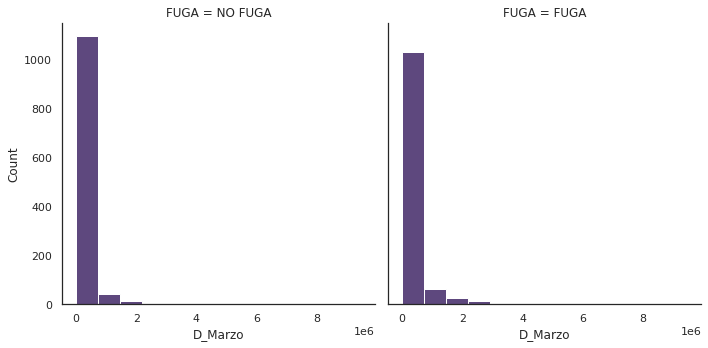

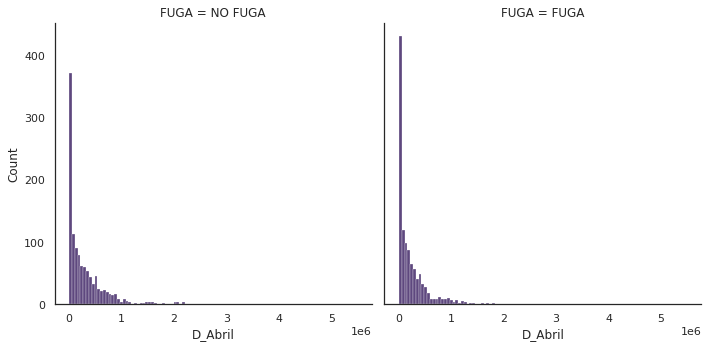

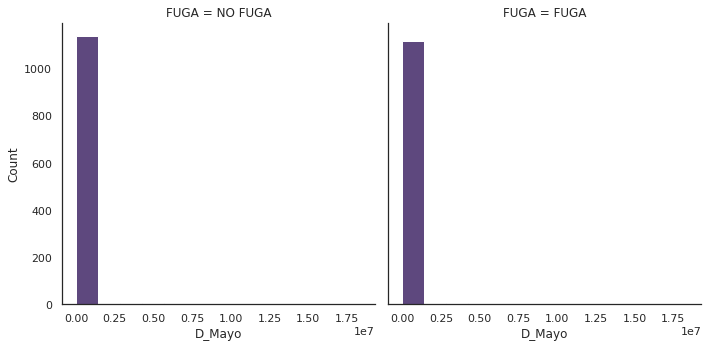

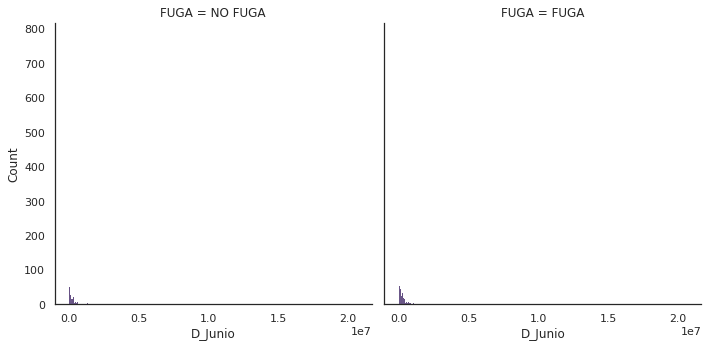

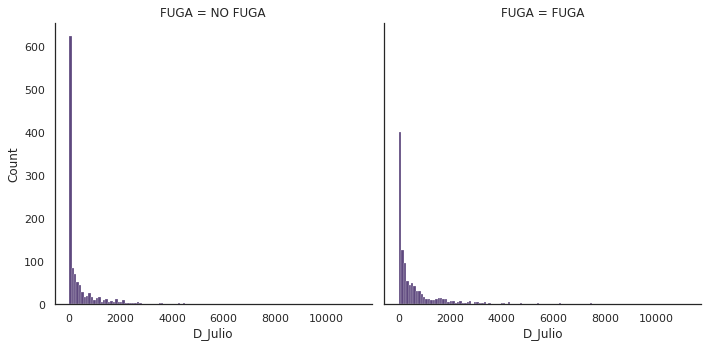

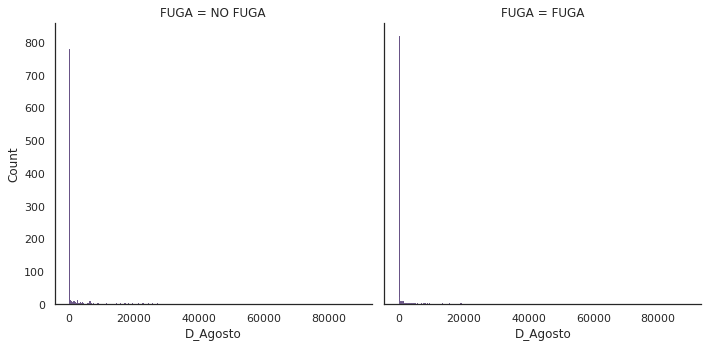

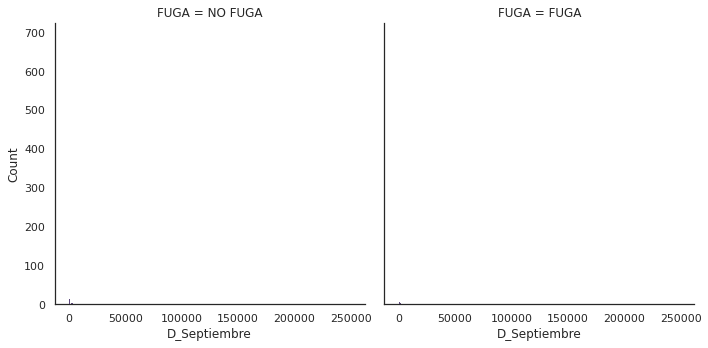

In [ ]:
sns.displot(data=Datos, x='D_Marzo', col='FUGA')
sns.displot(data=Datos, x='D_Abril', col='FUGA')
sns.displot(data=Datos, x='D_Mayo', col='FUGA')
sns.displot(data=Datos, x='D_Junio', col='FUGA')
sns.displot(data=Datos, x='D_Julio', col='FUGA')
sns.displot(data=Datos, x='D_Agosto', col='FUGA')
sns.displot(data=Datos, x='D_Septiembre', col='FUGA')

En la mayoría de los gráficos anteriores, se puede apreciar la concentración de datos en valores pequeños, así como la existencia de otros registros mucho más alejados y menos frecuentes. De este modo, para entender mejor la naturaleza de las variables, es pertinente utilizar una transformación logarítmica.

## Exploración de Comportamiento Conjunto de Atributos

A continuación se presenta la distribución de diversos pares de atributos, con el objetivo de identificar posibles patrones existentes, que orienten sobre el comportamiento vinculado de los mismos.

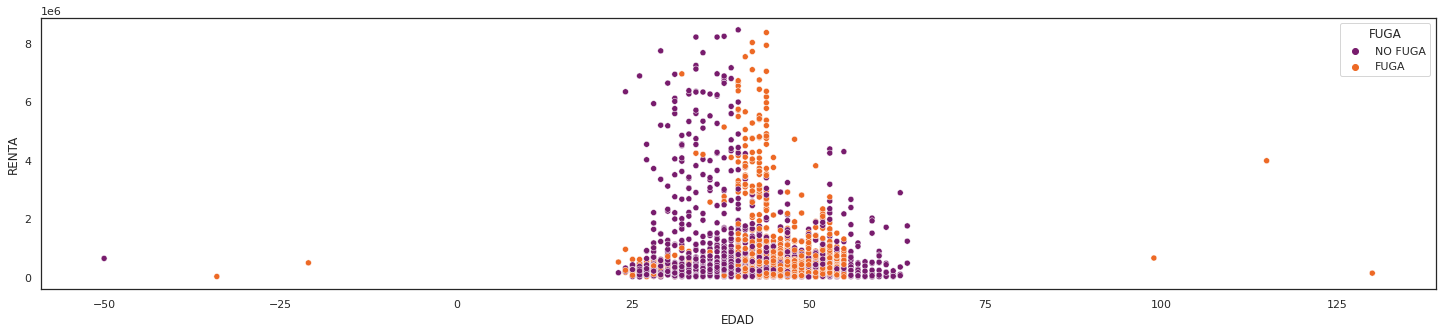

In [ ]:
sns.scatterplot(x='EDAD', y='RENTA',  hue='FUGA', data= Datos, palette="inferno")

Junto con volver a reconocer rápidamente los valores extremos para el atributo "EDAD", se vislumbra una mayor preponderancia de concentración de edades menores para el caso de no fuga, en comparación con la concentración de edades algo mayores para el caso de fuga. Considerando la relación con la variable renta, podemos observar una distribución de los datos en forma de campana, es decir, para menores valores de renta, las edades de las personas que se fugan, se encuentra concentrado en un rango más amplio.

(22.0, 65.0)

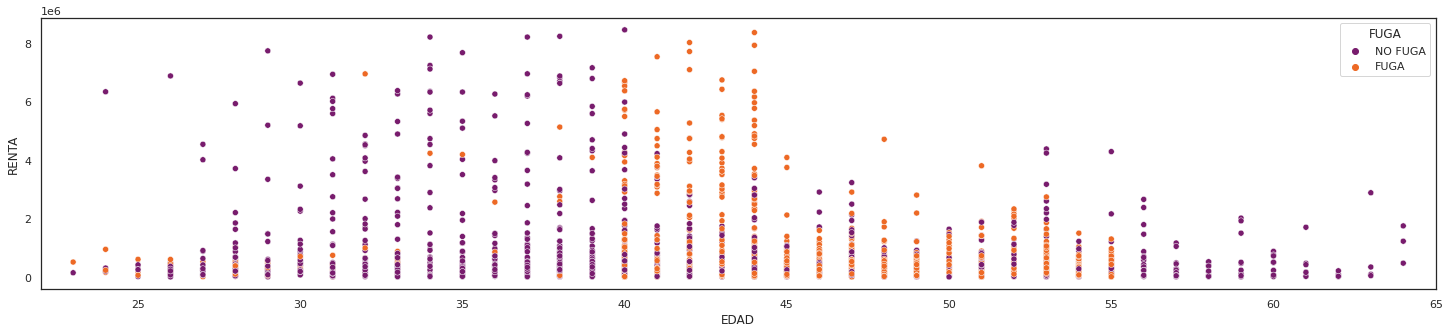

In [ ]:
sns.scatterplot(x='EDAD', y='RENTA',  hue='FUGA', data= Datos, palette="inferno")
plt.xlim(22, 65)

Del extracto recién presentado, se refuerza lo comentado anteriormente, siendo observable además una concentración adicional pero menor de clientes que no fugan, pertenecientes a las edades mayores y las rentas más bajas.

Notar también que, las personas con restas elevadas (>3) tanto para casos de fuga y no fuga, suelen ser adultos jóvenes entre 25 y 45 años. 

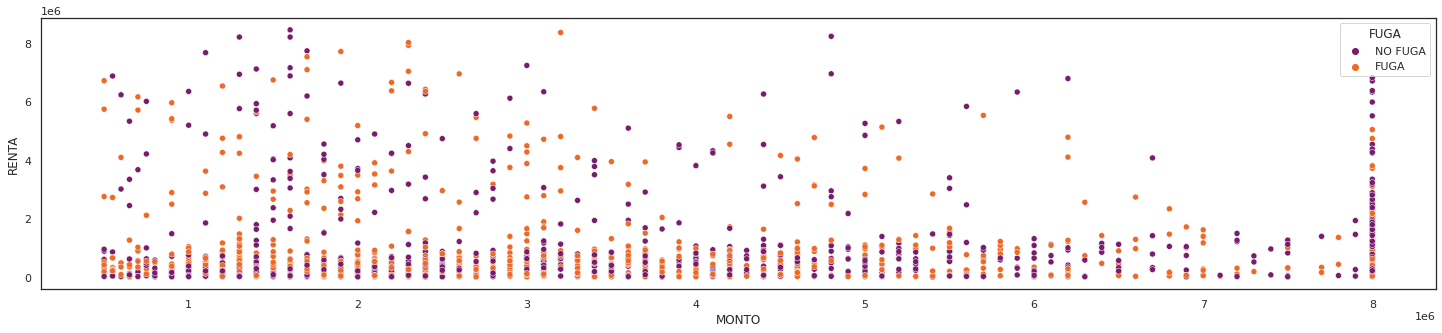

In [ ]:
sns.scatterplot(x='MONTO', y='RENTA',  hue='FUGA', data= Datos, palette="inferno")

El gráfico de dispersión anterior no muestra un patrón claro de comportamiento para el par de atributos correspondiente a "MONTO" y "RENTA". En forma complementaria, se puede mencionar que hay una mayor concentración de clientes, independiente de su condición de fuga o no, en los rangos de menores ingresos y en todo el espectro de montos preaprobados posibles, con una concentración particular en el monto de crédito pre aprobado más alto para todos los rangos de renta, lo que puede explicarse por otras caracteristicas del cliente que no sé relacionan con la renta y que generan que sea un cliente apto para un crédito de esa magnitud.

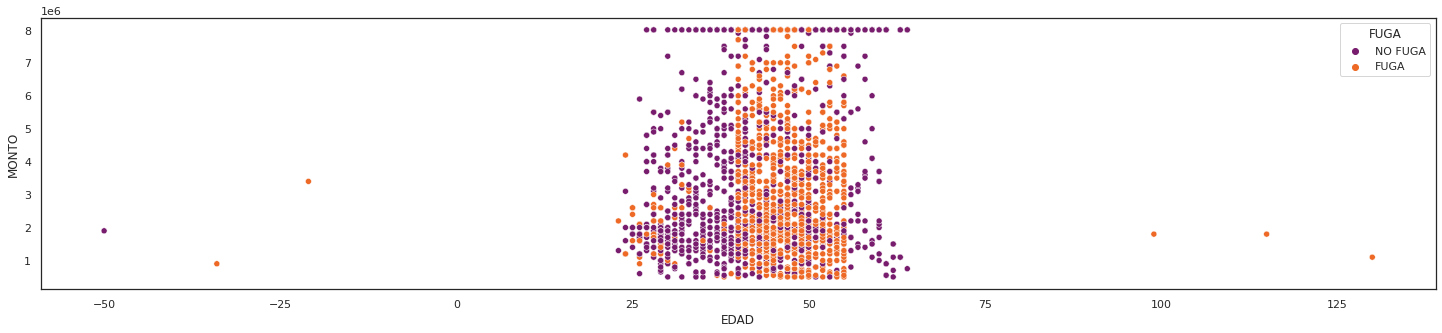

In [ ]:
sns.scatterplot(x='EDAD', y='MONTO',  hue='FUGA', data= Datos, palette="inferno")

De manera similar a la dispersión entre "EDAD" y "RENTA", para el par de variables "EDAD" y "MONTO", existe una mayor concentración de clientes que no fugan y que poseen edades menores que los clientes que si fugan, a lo largo de todo el rango posible de montos preaprobados. Se repite también una concentración menor de clientes que tampoco fugan, pero que son de edad mayor al grueso de casos que sí fugan.

A continuación se muestra la dispersión de datos mostrada por las variables "RENTA" en conjunto con las diversas deudas mensuales, para los casos de fuga o no, partiendo desde los meses más cercanos al término del período analizado.

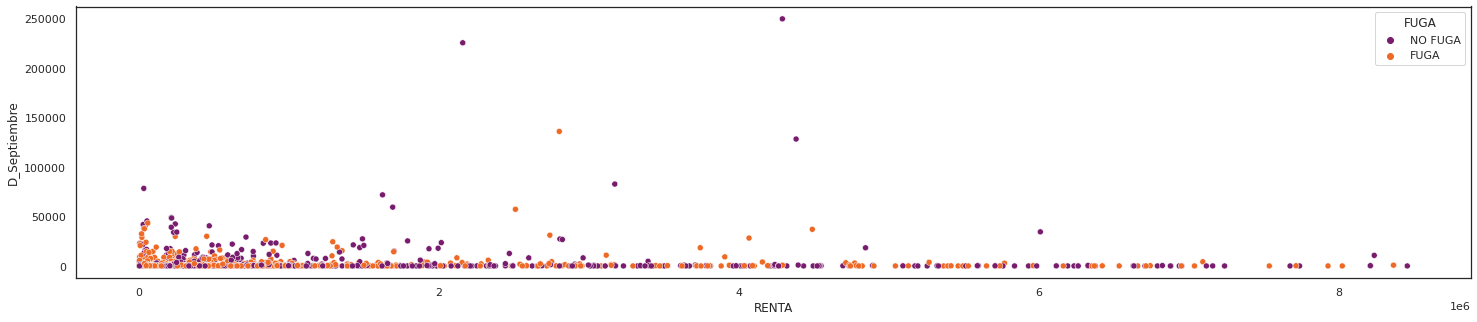

In [ ]:
sns.scatterplot(x='RENTA', y='D_Septiembre',  hue='FUGA', data= Datos, palette="inferno")

Del gráfico anterior se observa que, independiente de la condición final de fuga o fidelización, las deudas del mes de Septiembre se concentran en valores menores a los $25.000, independiente de la renta del cliente.

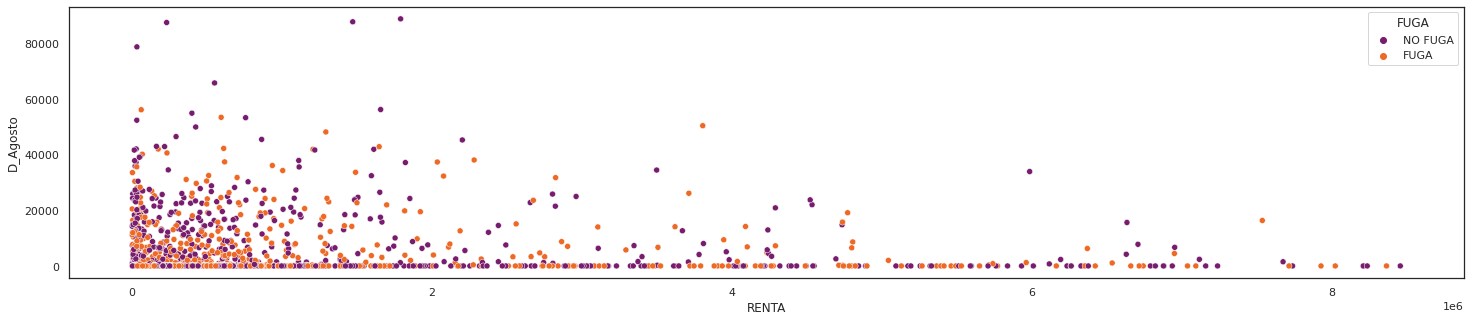

In [ ]:
sns.scatterplot(x='RENTA', y='D_Agosto',  hue='FUGA', data= Datos, palette="inferno")

A nivel general, la dispersión mostrada para las deudas de Agosto en relación a la renta, presentan el mismo comportamiento que para la deuda de Septiembre.

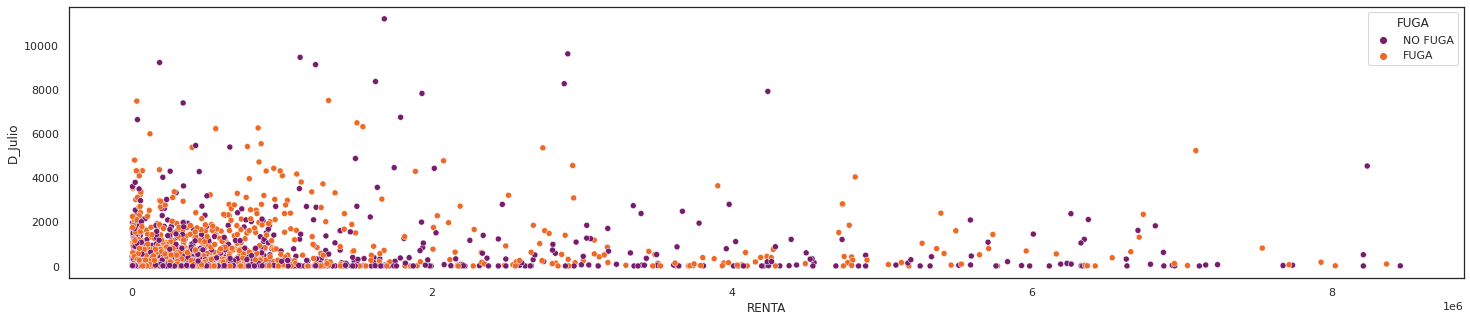

In [ ]:
sns.scatterplot(x='RENTA', y='D_Julio',  hue='FUGA', data= Datos, palette="inferno")

A grandes rasgos, del gráfico anterior no se puede destacar algún patrón de comportamiento relevante. Sin desmedro de lo anterior, se tiene que los montos de deuda del mes de Julio, son, en general, menores en magnitud que para los meses de Agosto y Septiembre, pudiendo mencionarse una concentración mayor de datos, para deudas menores a $4.000, en las rentas menores a 2 millones.

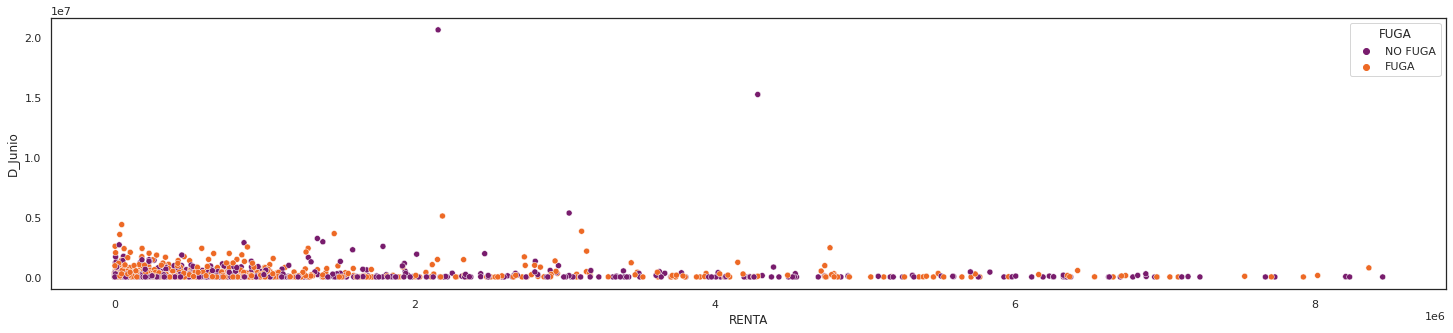

In [ ]:
sns.scatterplot(x='RENTA', y='D_Junio',  hue='FUGA', data= Datos, palette="inferno")

Para la deuda del mes de Junio, se puede observar que existen un par de clientes con elevados montos de deuda, con rentas entre 2 y 5 millones, que se alejan mucho del resto de los casos disponibles de estudio, lo que altera la percepción de la distribución de los clientes con menos deuda.

(0.0, 2000000.0)

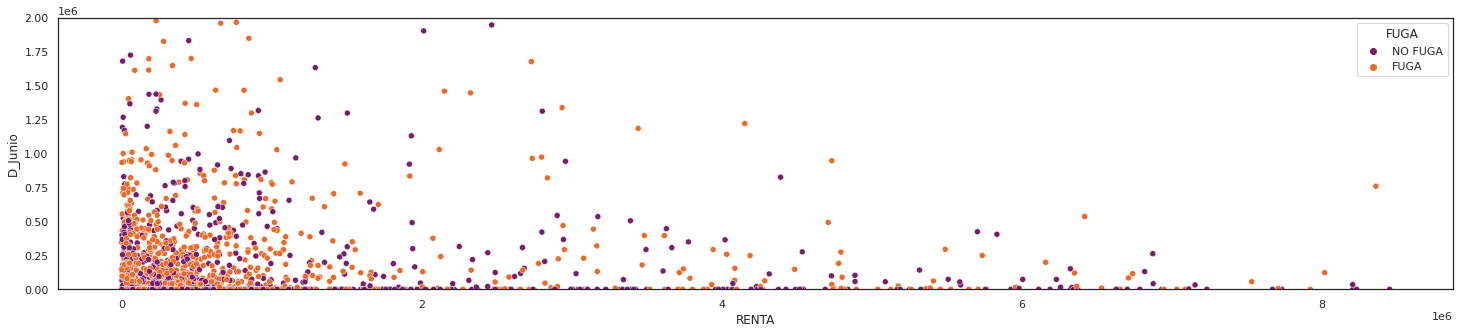

In [ ]:
sns.scatterplot(x='RENTA', y='D_Junio',  hue='FUGA', data= Datos, palette="inferno")
plt.ylim(0, 2000000)

Del extracto anterior, correspondiente también a la deuda del mes de Junio, pero restringido a las deudas menores a dos millones, podemos observar una gran cantidad de clientes, aparentemente con mayoría de casos que sí fugan, que se concentran hasta cerca de los $700.000 de deuda y poseen rentas de hasta un poco más de 1 millón.

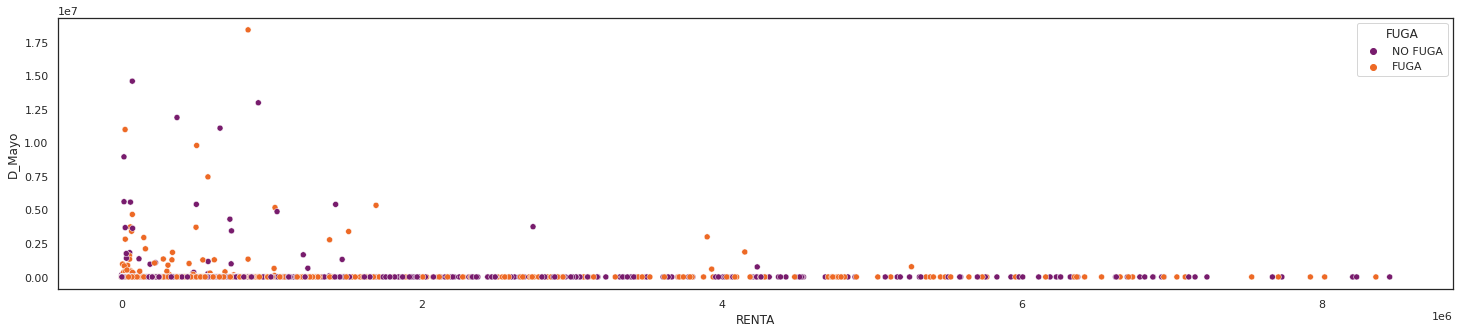

In [ ]:
sns.scatterplot(x='RENTA', y='D_Mayo',  hue='FUGA', data= Datos, palette="inferno")

Al igual que en el caso anterior, la existencia de casos con deudas mucho mayores al grueso de los clientes, particularmente para registros con rentas menores a 2 millones de pesos, dificulta la identificación de un patrón más general. Sin embargo, se vislumbran algunos casos entre deudas de 1 a 2 millones de pesos, donde se muestran varios casos de clientes que finalmente fugan, lo cual podría ser un aspecto a tener en cuenta al momento de plantear más adelante políticas comerciales que reduzcan la fuga, si es que esto resulta relevante.

(0.0, 2000000.0)

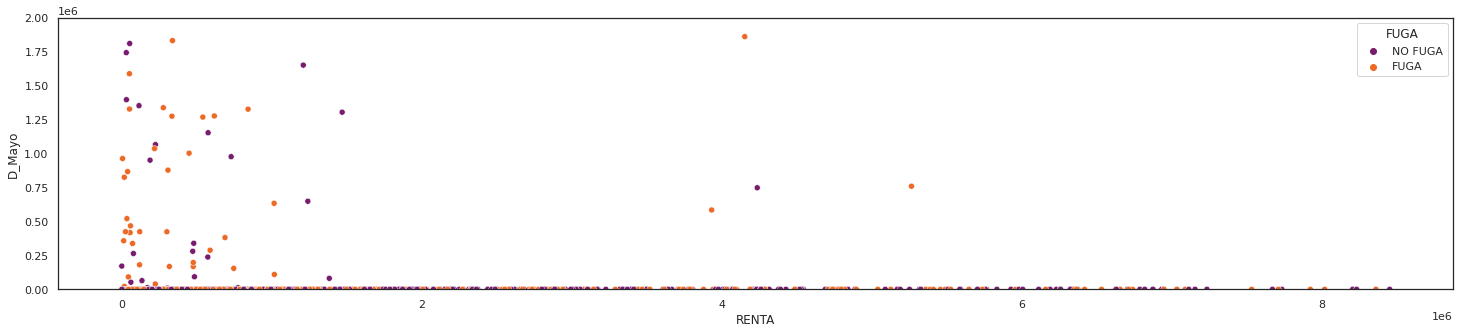

In [ ]:
sns.scatterplot(x='RENTA', y='D_Mayo',  hue='FUGA', data= Datos, palette="inferno")
plt.ylim(0, 2000000)

Se puede observar, de manera consistente con el análisis exploratorio inicial que muestra valor nulo para los tres primeros cuartiles de la deuda del mes de Mayo, que existe una gran mayoría de clientes con deuda cero para esta instancia.

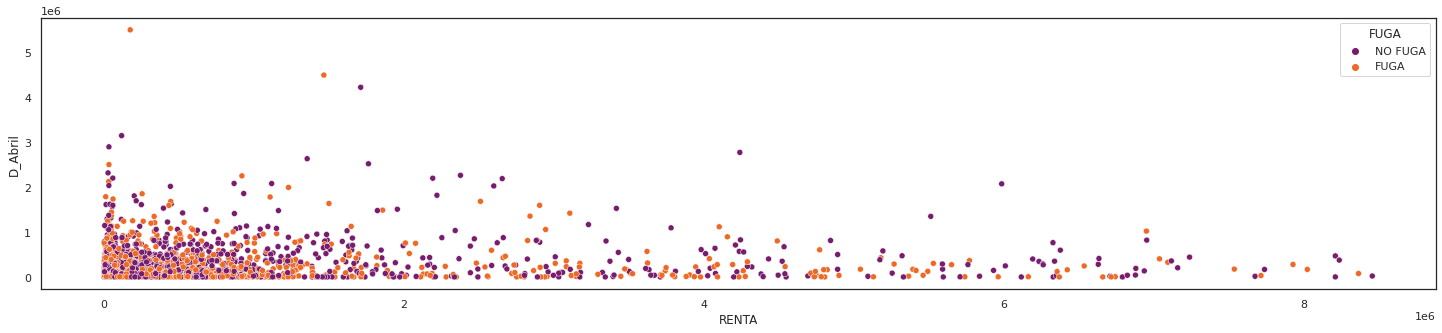

In [ ]:
sns.scatterplot(x='RENTA', y='D_Abril',  hue='FUGA', data= Datos, palette="inferno")

En el gráfico de dispersión anterior, no es observable algún patrón relevante de comportamiento. Sin embargo, se puede mencionar una mayor concentración de casos, tanto para fuga como no fuga, de de deudas menores a 1.5 millones, para rentas entre 0 y 2 millones de pesos.

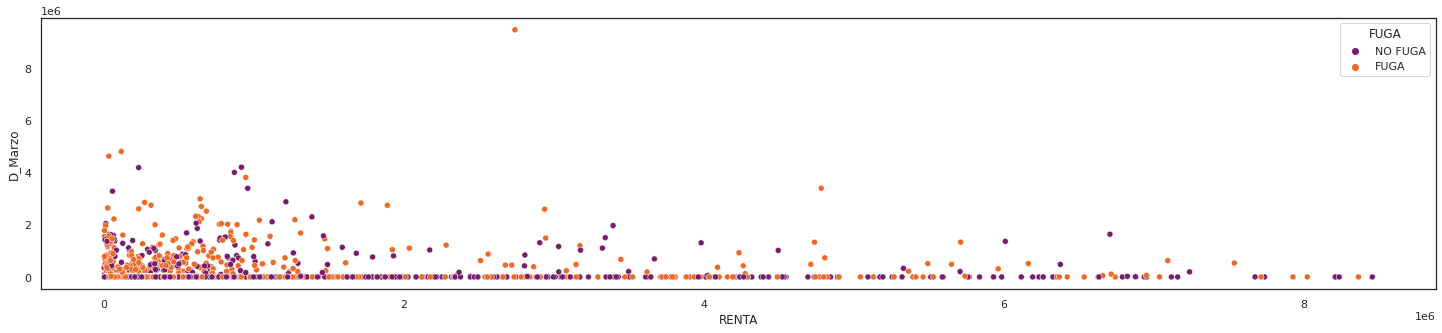

In [ ]:
sns.scatterplot(x='RENTA', y='D_Marzo',  hue='FUGA', data= Datos, palette="inferno")

De manera análoga al caso del mes de Mayo, para Marzo hay una gran mayoría de clientes con deuda nula, independiente de sus rentas. Se observa además una mayor densidad de datos para deudas entre 0 y 2 millones de pesos, en los casos de rentas entre 0 y algo superiores a 1.5 millones de pesos.